<h2 align="center">Paweł Kocimski </h2>
<h3 align="center">Metody Obliczeniowe w Nauce i Technice </h3>
<h4 align="center">Lab 11 Generatory Liczb Losowych</h4>

<h5>Zadanie 1 Testowanie generatorów liczb losowych</h5>
Dla obydwu generatorów liczb losowych (Mersenne Twister oraz PCG64) oraz dla n =
10, 1000, 5000 wylosuj n liczb losowych pochodzących z rozkładu jednostajnego i wykonaj
następujące kroki.

<P>1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach.</p>

In [1]:
import random
from numpy.random import default_rng
from matplotlib import pyplot as plt

def plot(x, generator):

    plt.hist(x, density=False, bins=10, label="Data")

    plt.legend(loc="upper left")
    plt.ylabel('Number of random digits')
    plt.xlabel('Data')
    plt.title("Histogram {0} digits={1}".format(generator, len(x)))
    plt.show()
    
def distribution_10_partitions():
    for n in [10, 1000, 5000]:
        pcg64 = []
        mersene_twister = []

        for _ in range(n):
            pcg64.append(default_rng().random())
            mersene_twister.append(random.random())
        plot(pcg64, "PCG64")
        plot(mersene_twister, "Mersenne Twister")

distribution_10_partitions()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<h6>Wnioski</h6>
1.Im więcej losowych liczb tym wykres bardziej upodabnia się do wykresu gestości prawdopodobieństwa rozkładu jednostajnego.

2. Sprawdź dla ilu liczb spełniona jest nierówność ${x}_{i} < {x}_{i+1}$ . Ile powinno ich być dla
idealnego generatora?

In [2]:
def check_inequality_between_previous_and_next():
    for n in [10, 1000, 5000]:
        pcg64 = 0
        mersenne_twister = 0
        for i in range(n):
            next_pcg64 = default_rng().random()
            next_meresenne_twister = random.random()
            if i > 0 and next_pcg64 > previous_pcg64:
                pcg64 += 1
            if i > 0 and next_meresenne_twister > previous_mersenne_twister:
                mersenne_twister += 1

            previous_pcg64 = next_pcg64
            previous_mersenne_twister = next_meresenne_twister
        print( "GENERATOR: PCG64\t\t Number of digits: {0}\t Number of digits satisfy inequality: {1}"
               .format(n,pcg64))
        print( "GENERATOR: Mersenne twister\t Number of digits: {0}\t Number of digits satisfy inequality: {1}"
               .format(n,mersenne_twister))

check_inequality_between_previous_and_next()

GENERATOR: PCG64		 Number of digits: 10	 Number of digits satisfy inequality: 5
GENERATOR: Mersenne twister	 Number of digits: 10	 Number of digits satisfy inequality: 5
GENERATOR: PCG64		 Number of digits: 1000	 Number of digits satisfy inequality: 480
GENERATOR: Mersenne twister	 Number of digits: 1000	 Number of digits satisfy inequality: 504
GENERATOR: PCG64		 Number of digits: 5000	 Number of digits satisfy inequality: 2504
GENERATOR: Mersenne twister	 Number of digits: 5000	 Number of digits satisfy inequality: 2513


<h6>Wnioski</h6>
1.Jesli chodzi o spełnianie nierówności ${x}_{i} < {x}_{i+1}$ to oba generatory wypadają podobnie.<br>
2.Nierówność ${x}_{i} < {x}_{i+1}$ dla idealnego generatora powinna być spełniona dla 50% przypadków.<br>
3.Rozbieżnoći dla powyższych generatorów wynoszą maksymalnie 5% dla 1000 liczb i 2% dla 5000 liczb.<br>

3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu <a href="https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final">https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final</a><br>
i wykorzystaj go do sprawdzenia wylosowanego ciągu liczb.

Funkcja zamieniająca liczbę zmiennoprzecinkową w zapisie dziesiętnym na zapis binarny(zwraca cyfry znajdujące się po przecinku)

In [3]:
from scipy import special as spc

def float_bin(number):
    res = ''
    for i in range(100):
        number *= 2
        res += str(int((number//1)))
        if number > 1:
            number %= 1
        elif number == 1:
            number = 0
            break
    return res

Funkcja testujaca 1 liczbę

In [4]:
def monobit(bin_data: str):
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / np.sqrt(len(bin_data))
    p_val = spc.erfc(np.fabs(sobs) / np.sqrt(2))
    return p_val


Funkcja testująca listę liczb

In [5]:
import numpy as np

def monobit_frequency_test():
    for n in [10, 1000, 5000]:
       non_random_pcg64 = 0
       non_random_mersenne_twister = 0
       for _ in range(n):
            pcg64 = default_rng().random()
            meresenne_twister = random.random()
            if monobit(float_bin(pcg64)) < 0.01:
                non_random_pcg64 += 1
            if monobit(float_bin(meresenne_twister)) < 0.01:
                non_random_mersenne_twister += 1

       print("GENERATOR: PCG64\t\t\t Number of digits: {0}\t Number of digits which are non-random: {1}"
                .format(n, non_random_pcg64))
       print("GENERATOR: Mersenne twister\t\t Number of digits: {0}\t Number of digits which are non-random: {1}"
                .format(n, non_random_mersenne_twister))

monobit_frequency_test()

GENERATOR: PCG64			 Number of digits: 10	 Number of digits which are non-random: 0
GENERATOR: Mersenne twister		 Number of digits: 10	 Number of digits which are non-random: 0
GENERATOR: PCG64			 Number of digits: 1000	 Number of digits which are non-random: 11
GENERATOR: Mersenne twister		 Number of digits: 1000	 Number of digits which are non-random: 16
GENERATOR: PCG64			 Number of digits: 5000	 Number of digits which are non-random: 52
GENERATOR: Mersenne twister		 Number of digits: 5000	 Number of digits which are non-random: 59


<h6>Wnioski</h6>
1.Około 1% liczb nie jest generowanych losowo.<br>
2.W powyższym teście oba generatory wypadają podobnie.<br>

<h6>Zadanie 2 Generowanie liczb z rozkładu normalnego</h6>

Zaimplementuj generator liczb losowych pochodzących z rozkładu normalnego za pomo-
cą metody Boksa-Mullera i zaprezentuj wyniki dla n = 10, 100, 5000 wygenerowanych
liczb. Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie stan-
dardowe jako parametry.

1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. Na tym samym wykresie umieść funkcję gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach.

In [6]:
def pnorm(mu = 0, sigma = 1):
    u1 = np.random.uniform()
    u2 = np.random.uniform()
    r = np.sqrt(-2*np.log(u1))
    a = 2*np.pi*u2
    return sigma*r*np.cos(a) + mu, sigma*r*np.sin(a) + mu

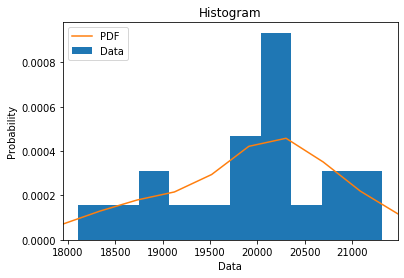

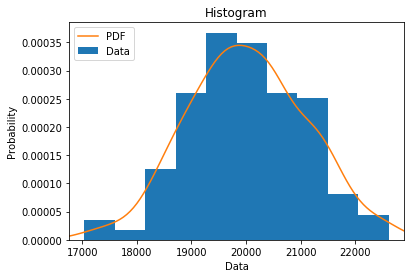

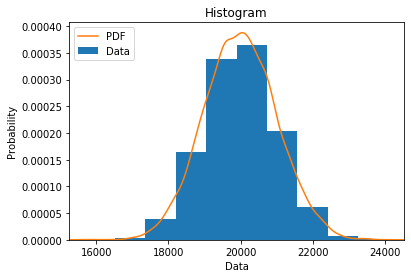

In [7]:
import scipy.stats as st

def box_muller_generator(mu = 0, sigma = 1):
    for n in [10, 100, 5000]:
        x = []
        for _ in range(n): x += pnorm(mu, sigma)
        plt.hist(x, density=True, bins=10, label="Data")
        mn, mx = plt.xlim()
        plt.xlim(mn, mx)
        kde_xs = np.linspace(mn, mx, n)
        kde = st.gaussian_kde(x)
        plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
        plt.legend(loc="upper left")
        plt.ylabel('Probability')
        plt.xlabel('Data')
        plt.title("Histogram");
        plt.show()

box_muller_generator(20000, 1000)

<h6>Wnioski</h6>
1.metoda Boksa-Mullera dobrze nadaje się do generowania rozkładu normalnego przy użyciu rozkładu jednostajnego.<br>
2.Wykresy potwierdzają poprawność zaimplementowanej metody(na pierwszy rzut oka , można stwierdzić, że jest spełniona zasada trzech sigm).<br>
3.Do generowania rozkładu normalnego można użyć ulepszonej metody Boksa-Mullera nie korzysstającej z funkcji trygonometrycznych.

2. Wykonaj test statystyczny Shapiro-Wilka, przedstaw uzyskaną p-wartość, informa-
cję czy hipoteza zerowa została przyjęta/odrzucona dla $α = 0, 05$ i czy w związku
z tym są podstawy do stwierdzenia że liczby pochodzą z rozkładu normalnego.

Zaimplementowana funkcja testująca przy pomocy testu Shapiro-Wilka

In [8]:
def shapiro_wilk_test_20(mu = 0, sigma = 1):
        teretical_value = 0.905
        n = 10
        x = []
        for _ in range(n): x += pnorm(mu, sigma)
        x.sort()
        avg = sum(x) / len(x)
        S_2 = sum((i-avg)**2 for i in x)
        weights_a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
        b_2 = (sum((x[19-i] - x[i])*weights_a[i] for i in range(10)))**2
        W = b_2 / S_2
        print("Statistic W: {0}".format(W))
        if W > teretical_value:
            print("Hypothesis null accepted")
        else:
            print("Hypothesis null rejected")

shapiro_wilk_test_20()

Statistic W: 0.9293662426376869
Hypothesis null accepted


Biblioteczna funkcja testująca 

In [9]:
def shapiro_wilk_test(mu = 0, sigma = 1):
    alfa = 0.05
    for n in [100, 5000]:
        x = []
        for _ in range(n): x += pnorm(mu, sigma)
        W, p_value = st.shapiro(x[0:n])
        print("p value: {0}".format(p_value))
        if p_value > alfa:
            print("Hypothesis null accepted")
        else:
            print("Hypothesis null rejected")

shapiro_wilk_test()

p value: 0.907313883304596
Hypothesis null accepted
p value: 0.812414824962616
Hypothesis null accepted


<h6>Wnioski</h6>
1.Hipoteza zerowa została potwierdzona, więc liczby są generowane z rozkładem normalnym.<br>
2.Test Shapiro-Wilka ma największą moc spośród innych testów badających normalność: Test Andersona-Darlinga, Test Kołmogorowa-Smirnowa czy Test Lilliefors.<br>

<h6>Zadanie 3 Metoda Monte Carlo</h6>

Napisz funkcję która zwróci przybliżoną wartość liczby pi wykorzystującą metodę Monte Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować liczbę wylosowanych punktów jako parametr. Zwizualizuj koło, zaznaczając na jednym kolorem punkty które trafiły do jego wnętrza, a drugim te które trafiły na zewnątrz. Na wykresie zwizualizuj błąd bezwzględny wraz z rosnącą liczbą punktów

In [10]:
def plot_absolute_error(absolute_errors, points_one_iter, no_of_intervals):
    no_of_points = np.linspace(points_one_iter, no_of_intervals*points_one_iter, no_of_intervals)
    plt.subplot(1, 2, 2)
    plt.plot(no_of_points, absolute_errors, label="absolute errors")
    plt.legend(loc="upper left")
    plt.ylabel('Absolute error')
    plt.xlabel('Number of points')
    plt.title("Relationship between no of points and abs error")
    plt.show()

Pi : 3.141592653589793, approximation: 3.1471471471471473


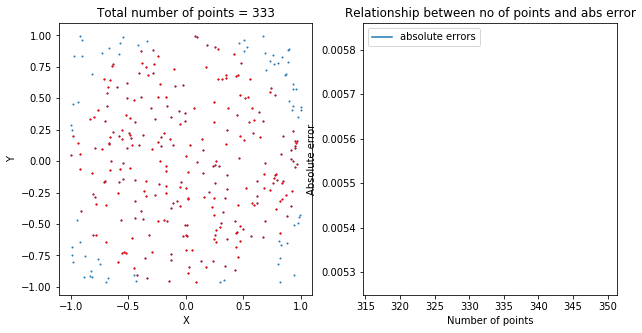

Pi : 3.141592653589793, approximation: 3.129129129129129


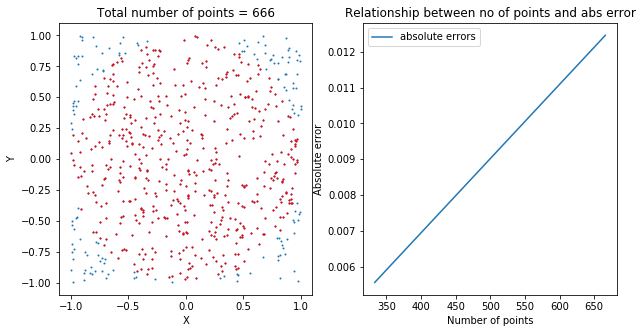

Pi : 3.141592653589793, approximation: 3.115115115115115


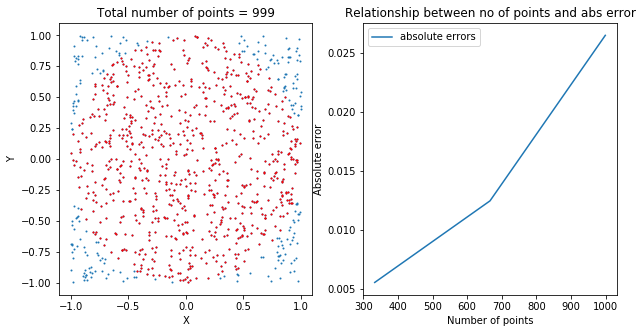

Pi : 3.141592653589793, approximation: 3.1471471471471473


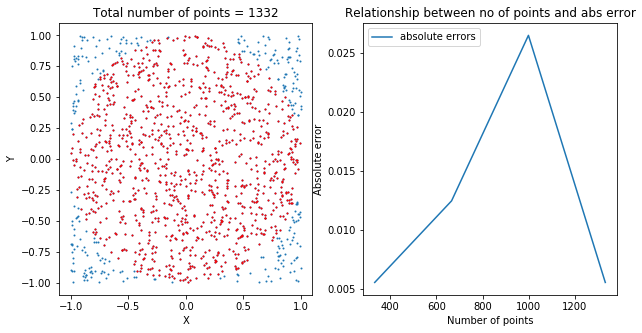

Pi : 3.141592653589793, approximation: 3.1543543543543544


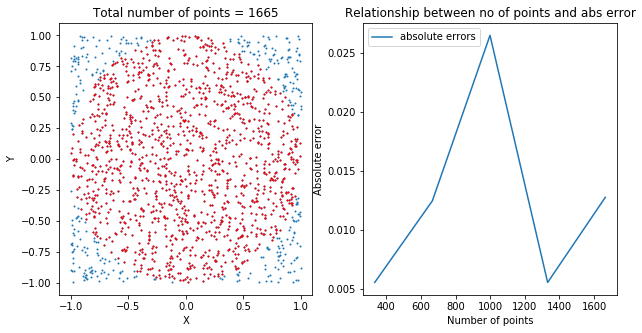

Pi : 3.141592653589793, approximation: 3.1431431431431434


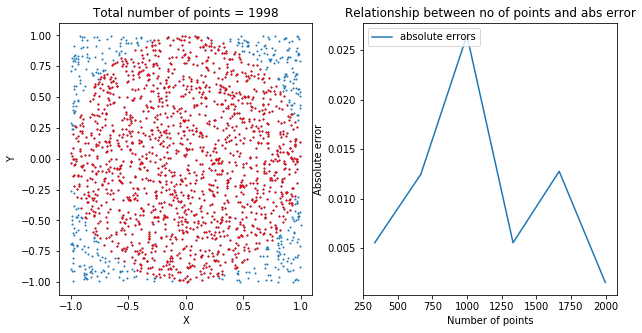

Pi : 3.141592653589793, approximation: 3.131703131703132


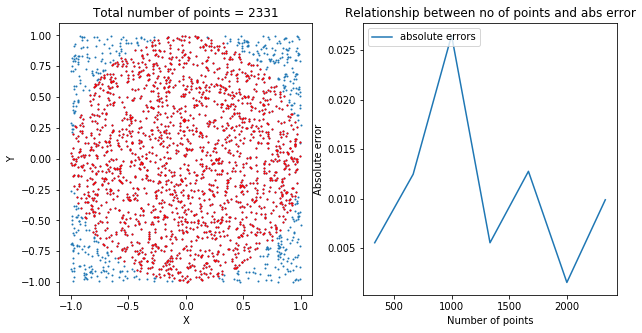

Pi : 3.141592653589793, approximation: 3.130630630630631


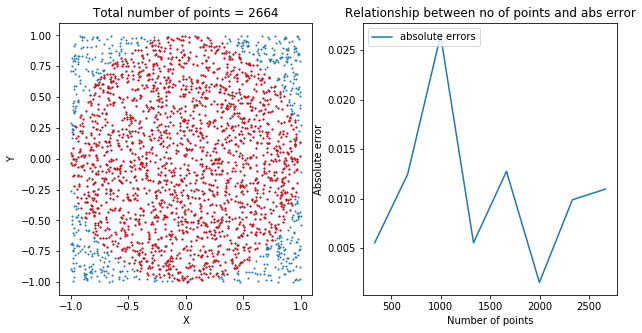

Pi : 3.141592653589793, approximation: 3.1418084751418083


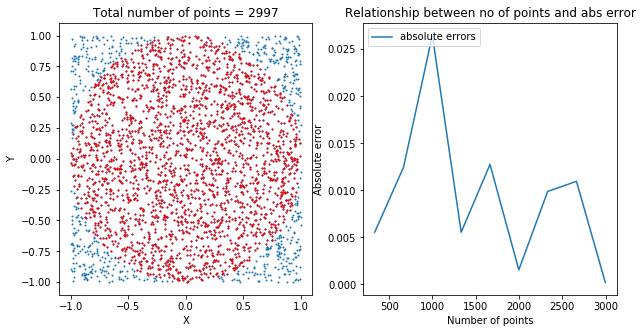

Pi : 3.141592653589793, approximation: 3.136336336336336


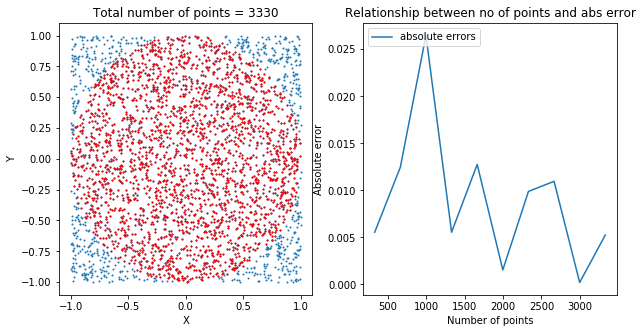

Pi : 3.141592653589793, approximation: 3.1274911274911275


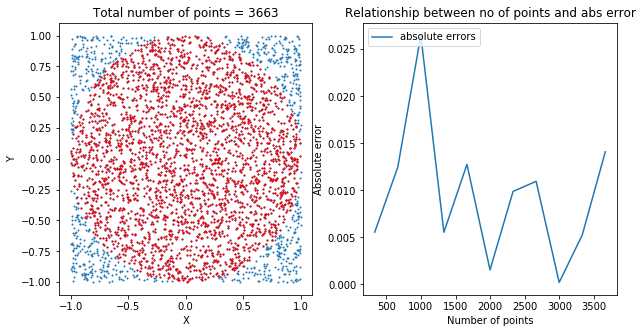

Pi : 3.141592653589793, approximation: 3.134134134134134


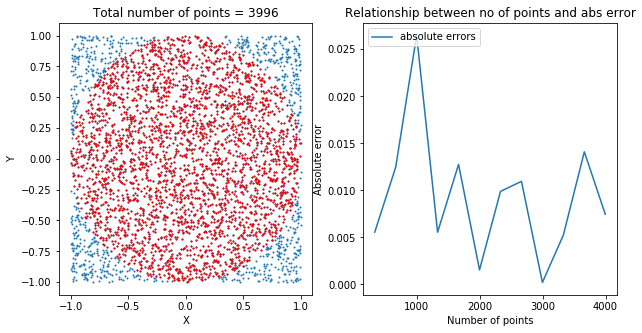

Pi : 3.141592653589793, approximation: 3.136983136983137


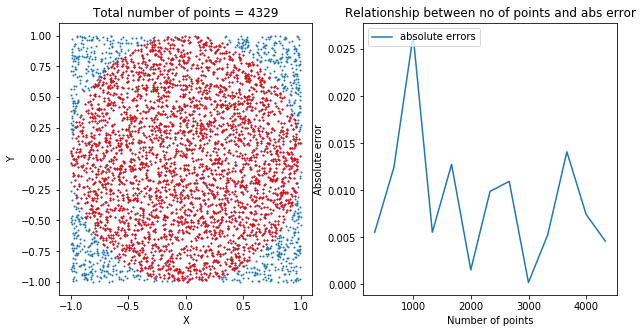

Pi : 3.141592653589793, approximation: 3.1334191334191335


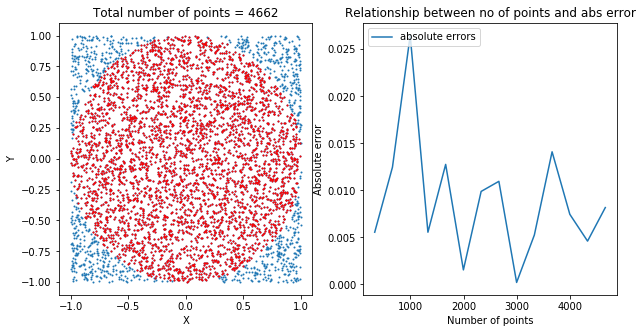

Pi : 3.141592653589793, approximation: 3.135935935935936


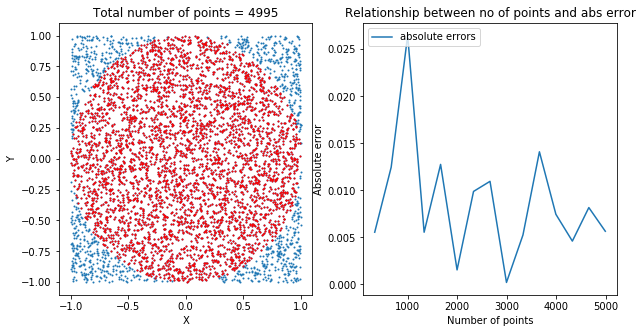

Pi : 3.141592653589793, approximation: 3.1426426426426426


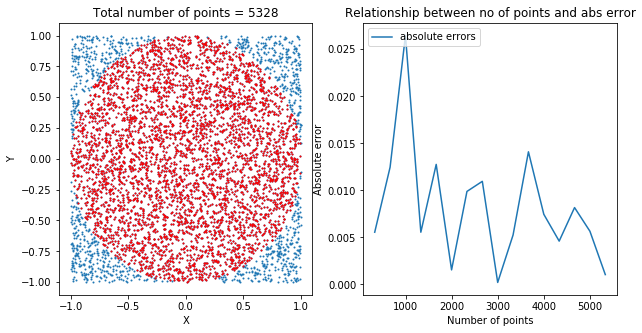

Pi : 3.141592653589793, approximation: 3.142907613495849


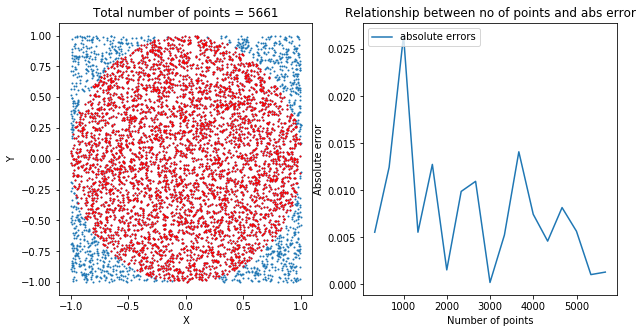

Pi : 3.141592653589793, approximation: 3.144477811144478


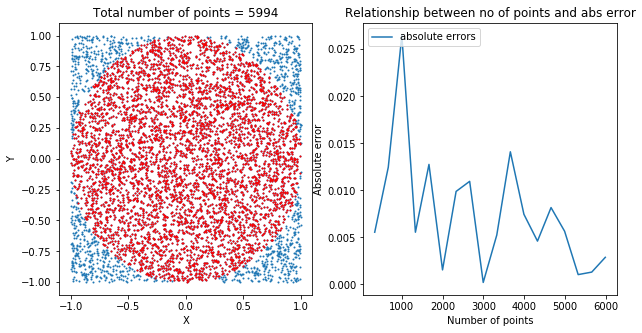

Pi : 3.141592653589793, approximation: 3.1414572467204045


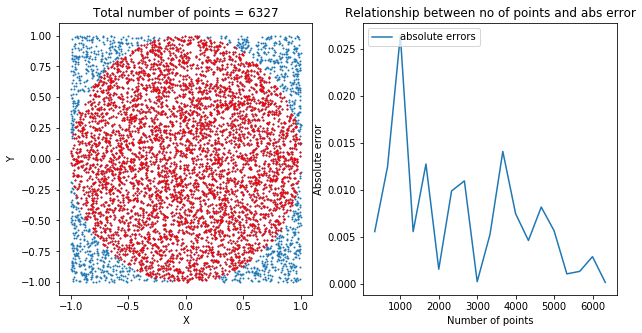

Pi : 3.141592653589793, approximation: 3.15015015015015


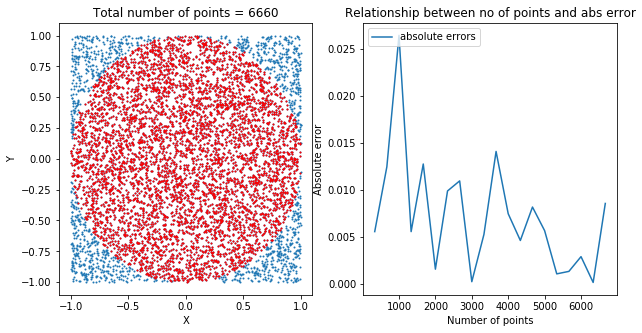

Pi : 3.141592653589793, approximation: 3.1562991562991565


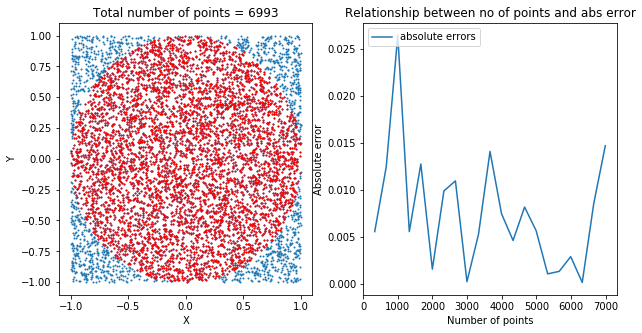

Pi : 3.141592653589793, approximation: 3.1553371553371554


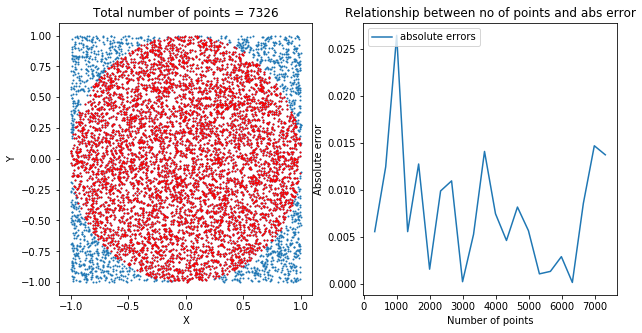

Pi : 3.141592653589793, approximation: 3.157070113591853


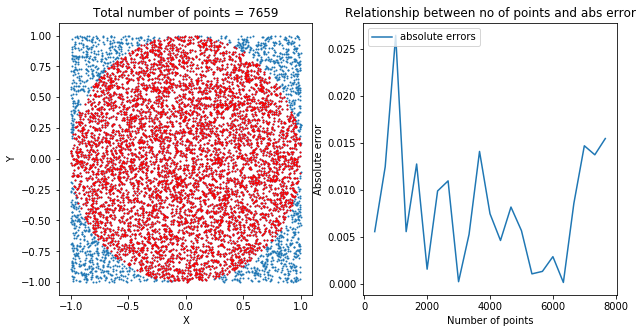

Pi : 3.141592653589793, approximation: 3.159159159159159


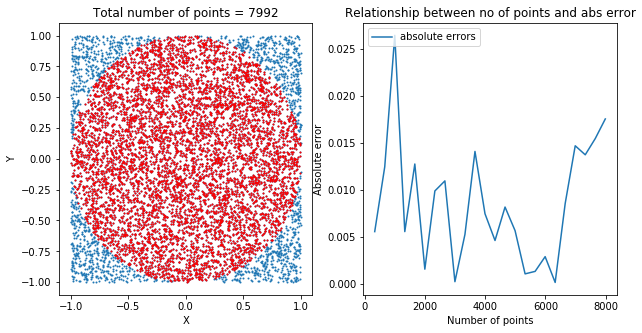

Pi : 3.141592653589793, approximation: 3.15003003003003


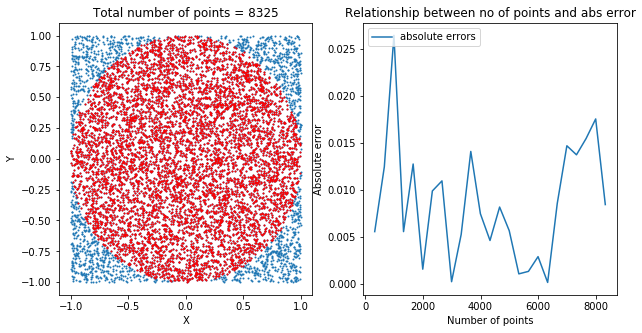

Pi : 3.141592653589793, approximation: 3.1485331485331485


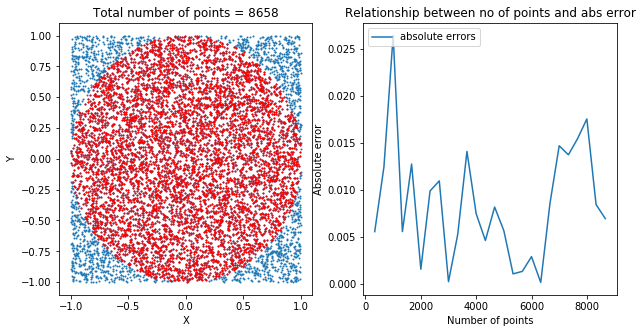

Pi : 3.141592653589793, approximation: 3.1515960404849293


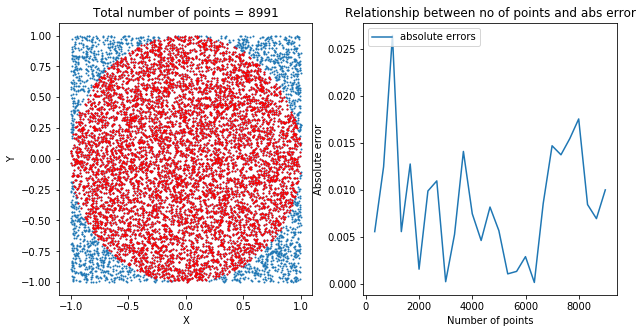

Pi : 3.141592653589793, approximation: 3.1497211497211497


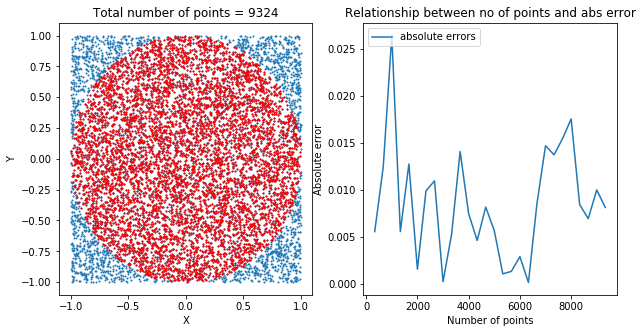

Pi : 3.141592653589793, approximation: 3.1508750129439784


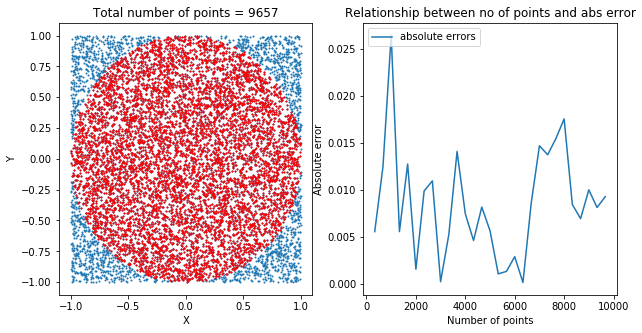

Pi : 3.141592653589793, approximation: 3.14994994994995


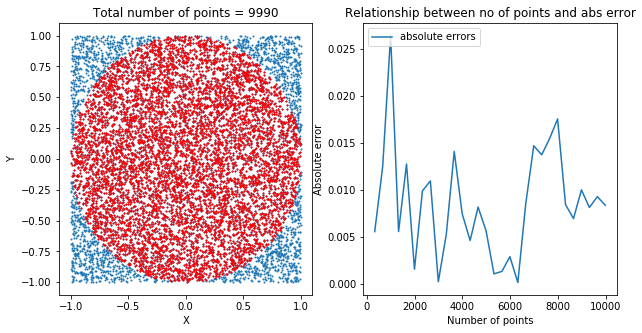

In [13]:
import time

def approximate_pi_monte_carlo(N, no_of_intervals = 30, time_interval = 30):
    x = np.array([])
    y = np.array([])

    absolute_errors = np.array([])
    points_one_iteration = int(N/no_of_intervals)

    for i in range(no_of_intervals):
        plt.figure(figsize=[10, 5])
        x = np.append(x, np.random.uniform(low=-1, high=1, size=[points_one_iteration, 1]))
        y = np.append(y, np.random.uniform(low=-1, high=1, size=[points_one_iteration, 1]))
        if_inside = x ** 2 + y ** 2 < 1

        approx_pi = 4 * np.sum(if_inside) / ((i+1)*points_one_iteration)
        absolute_errors = np.append(absolute_errors, abs(np.pi - approx_pi))

        print('Pi : {}, approximation: {}'.format(np.pi, approx_pi))

        x_in = x[if_inside]
        y_in = y[if_inside]
        plt.subplot(1, 2, 1)
        plt.scatter(x, y, s=1)
        plt.scatter(x_in, y_in,color='r', s=1)
        plt.ylabel('Y')
        plt.xlabel('X')
        plt.title("Total number of points = {}".format((i+1)*points_one_iteration))
        time.sleep(time_interval*10e-3)

        plot_absolute_error(absolute_errors, points_one_iteration, i+1)
        plt.show()

approximate_pi_monte_carlo(10000)

<h6>Wnioski</h6>
1.Przy pomocy metody Monte Carlo można i liczbie ${10}^{4}$ punktów można wyznaczyć liczbę pi z dokładnością około ${10}^{-2}$<br>
2.Wraz ze wzrostem liczby punktów rośnie dokładność wyznaczenia liczby pi

<h5>Wnioski ogólne</h5>
1.Istnieje wiele różnych generatorów mających rózne właściwości.Np.<br>
-rodzina PCG<br>
-Mersenne Twister<br>
-Arc4Random<br>
-ChaCha20†<br>
-Minstd (LCG)<br>
-LCG 64/32<br>
-XorShift 32<br>
-XorShift 64<br>
-RanQ<br>
-XorShift* 64/32<br>
2.Generatory są wykorzystywane w wielu róznych dziedzinach, stąd też tworzone są nowe gneratory.<br>
3.Generatory mozna testować przy pomocy wielu testów. Przykładowe to:<br>
-The Frequency (Monobit) Test,<br>
-Frequency Test within a Block,<br>
-The Runs Test,<br>
-Tests for the Longest-Run-of-Ones in a Block,<br>
-The Binary Matrix Rank Test,<br>
-The Discrete Fourier Transform (Spectral) Test,<br>
-The Non-overlapping Template Matching Test,<br>
-The Overlapping Template Matching Test,<br>
-Maurer's "Universal Statistical" Test,<br>
-The Linear Complexity Test,<br>
-The Serial Test,<br>
-The Approximate Entropy Test,<br>
-The Cumulative Sums (Cusums) Test,<br>
-The Random Excursions Test,<br>
-The Random Excursions Variant Test.<br>
4.Cechy którymi wyróżniają się generatory:<br>
-Jakość statystyczna<br>
-Trudność w prognozowaniu<br>
-Powtarzalność wyniki<br>
-Wiele strumieni<br>
-Okresowość<br>
-Przydatne cechy<br>
-Wydajność czasowa<br>
-Wykorzystanie przestrzeni<br>
-Rozmiar i złożoność kodu<br>
-k-wymiarowa ekwidystrybucja<br>